# Lab 7 - Was T. Rex just a big chicken?
## Computational Proteomics
Material and embedded lab.

Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

In [7]:
debug = True # Set this to False before pushing to be graded
display_available = True
try:
    display('Verifying you can use display')
    from IPython.display import Image
except:
    display_available = False
try:
    import pygraphviz
    graphviz_installed = True # Set this to False if you don't have graphviz
except:
    graphviz_installed = False

'Verifying you can use display'

# Paleontology meets computing (and statistics)
Controversy ensues...



* Protein sequencing was very difficult in 1950s but DNA sequencing was impossible
* Today DNA sequencing is essentially trivial while protein sequencing remains difficult
* Dinosaur drama (https://www.wired.com/2009/06/ff-originofspecies/)

<img src="https://images-na.ssl-images-amazon.com/images/I/81ZfeGANs9L._AC_SL1500_.jpg" width=400>

<img src="https://www.researchgate.net/profile/Jeovanis_Gil_Valdes2/publication/321347984/figure/fig2/AS:581671432593414@1515692684716/General-workflow-for-the-mass-spectrometry-based-proteomics-analysis-of-acetylated.png">

## Matching Ideal Spectra
This first section of exercises will allow you to implement algorithms under ideal circumstances where masses are not lost and there is no "noise" mass.

In reality... we have to deal with false and missing masses. One source of this misinformation is that when a mass spectrometer breaks a peptide, small parts of the resulting fragments may be lost, thus lowering their masses (location on the x axis). When breaking REDCA into RE, DCA, RE might lose a water molecule and DCA might lost an ammonia.

**Exercise 1**: Spectrum graph construction

We represent the masses in a spectrum as a sequence Spectrum of integers in increasing order. We define a labeled graph Graph(Spectrum) by forming a node for each element of ``spectrum``, then connecting nodes $s_i$ and $s_j$ by a directed edge labeled by an amino acid $a$ if $s_j−s_i$ is equal to the mass of $a$. We do not distinguish between amino acids having the same integer masses (i.e., the pairs K/Q and I/L). You'll need to add in a zero mass node at the beginning and the sum of all the masses as the last element.

Input: A list of integers ``spectrum``.

Output: A networkx graph that represents the graph described above.

In [8]:
# Just code to help you out here
%matplotlib inline

import networkx as nx
import pandas as pd
import copy

import matplotlib.pyplot as plt

def draw(A):
    return Image(A.draw(format='png', prog='dot'))

def to_adj(T):
    df = pd.DataFrame(nx.adjacency_matrix(T).todense(),index=T.nodes(),columns=T.nodes())
    for i in range(len(df)):
        for j in range(len(df)):
            if df.iloc[i,j] == 1:
                data = T.get_edge_data(df.index[i],df.columns[j])
                df.iloc[i,j] = data['label']
            else:
                df.iloc[i,j] = ""
    return df

def show(G):
    if graphviz_installed:
        # same layout using matplotlib with no labels
        pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='neato')
        #print(edge_labels)
        # Modify node fillcolor and edge color.
        #D.node_attr.update(color='blue', style='filled', fillcolor='yellow')
        #D.edge_attr.update(color='blue', arrowsize=1)
        A = nx.nx_agraph.to_agraph(G)
        A.graph_attr["rankdir"] = "LR"
        # draw it in the notebook
        if display_available:
            display(draw(A))
        else:
            print(A)
    else:
        if display_available:
            display(to_adj(G))
        else:
            print(to_adj(G))

In [9]:
import networkx as nx

a_mass = {
    "G": 57,
    "A": 71,
    "S": 87,
    "P": 97,
    "V": 99,
    "T": 101,
    "C": 103,
    "I": 113,
    "L": 113,
    "N": 114,
    "D": 115,
    "K": 128,
    "Q": 128,
    "E": 129,
    "M": 131,
    "H": 137,
    "F": 147,
    "R": 156,
    "Y": 163,
    "W": 186
}

mass_a = {}
for key in a_mass.keys():
    mass = a_mass[key]
    if mass not in mass_a:
        mass_a[mass] = []
    mass_a[mass].append(key)
    
pd.Series(mass_a) # Just for printing

57        [G]
71        [A]
87        [S]
97        [P]
99        [V]
101       [T]
103       [C]
113    [I, L]
114       [N]
115       [D]
128    [K, Q]
129       [E]
131       [M]
137       [H]
147       [F]
156       [R]
163       [Y]
186       [W]
dtype: object

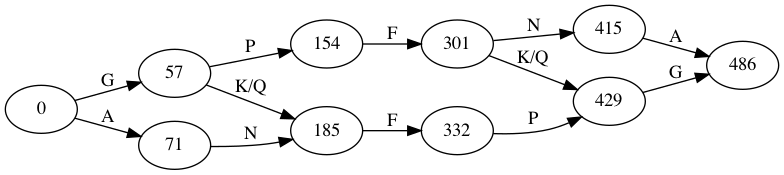

In [10]:
def spectrum_graph_construction(spectrum,mass_a=mass_a):
    spectrum = copy.copy(spectrum)
    spectrum.insert(0,0)
    G = nx.DiGraph()
    for i,s in enumerate(spectrum):
        G.add_node(s)
    # Your solution here
    return G

spectrum1 = [57,71,154,185,301,332,415,429,486]
graph1 = spectrum_graph_construction(spectrum1)

show(graph1)

**Exercise 2**: Ideal spectrum

Input: A ``peptide``

Output: A list that represents the masses of the ideal spectrum

In [11]:
def ideal_spectrum(peptide,a_mass=a_mass,prefix=True,suffix=True):
    ideal = [0]
    # Your solution here
    ideal.sort()
    return ideal

peptide1 = "GPG"
spectrum2 = ideal_spectrum(peptide1)
spectrum3 = ideal_spectrum("REDCA")

print(spectrum2)
print(spectrum3)

[0, 57, 57, 154, 154, 211]
[0, 71, 156, 174, 285, 289, 400, 418, 503, 574]


**Exercise 3**: Decoding the ideal spectrum

Input: A ``spectrum``

Output: All matching strings representing the peptide that corresponds to a path from *source* to *sink* in Graph(spectrum) whose ideal spectrum is equal to ``spectrum``.

In [13]:
import numpy as np

def decoding_ideal_spectrum(spectrum,a_mass=a_mass):
    mass_a = {}
    for key in a_mass.keys():
        mass = a_mass[key]
        if mass not in mass_a:
            mass_a[mass] = []
        mass_a[mass].append(key)
    G = spectrum_graph_construction(spectrum,mass_a=mass_a)
    # Your solution here
    return matches

spectrum5 = [57,114,128,215,229,316,330,387,444]
peptides5 = decoding_ideal_spectrum(spectrum5)

print(peptides5)


['GGTTK', 'GGTTQ', 'GGDSK', 'GGDSQ', 'GASDN', 'GATTN', 'NTTAG', 'NDSAG', 'KSDGG', 'QSDGG', 'KTTGG', 'QTTGG']


## From Ideal to Real Spectra

**Exercise 4**: Convert a peptide into a binary peptide vector.

Input: A peptide P.

Output: The peptide vector of P as a numpy array.

In [14]:
import numpy as np

def construct_peptide_vector(peptide,a_mass={"X":4,"Z":5}):
    total_mass = sum([a_mass[c] for c in peptide])
    vector = np.zeros((total_mass),dtype=int)
    # Your solution here
    return vector

peptide_v1 = construct_peptide_vector("XZZXX")

peptide_v1

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

**Exercise 5**: Convert a binary vector into a peptide.

Input: A numpy binary vector ``p``.

Output: A peptide whose binary peptide vector matches ``p``. For masses with more than one amino acid, any choice may be used.

In [15]:
def construct_peptide_from_vector(p,a_mass={"X":4,"Z":5}):
    peptides = []
    # Your solution here
    return peptides

p = np.array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])
peptides6 = construct_peptide_from_vector(p)

peptides6

['XXZZX', 'XZZXX']

**Exercise 6:** Peptide Sequencing Problem

Input: A spectral vector ``s``.

Output: A peptide with maximum score against ``s``. For masses with more than one amino acid, any choice may be used.

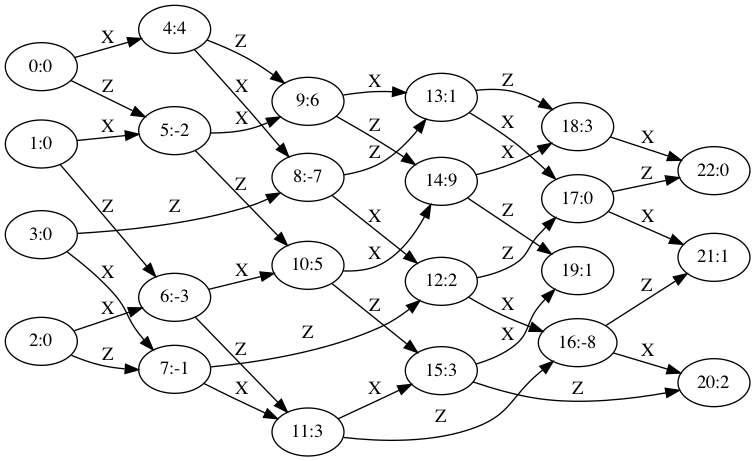

'XZZXX'

In [16]:
def max_peptide(s,a_mass={"X":4,"Z":5},debug=False):
    peptide = ""
    # Your solution here
    return peptide

p2 = [0,0,0,4,-2,-3,-1,-7,6,5,3,2,1,9,3,-8,0,3,1,2,1,0]
peptide7 = max_peptide(p2,debug=debug)

peptide7

In [17]:
# Don't forget to push!